<a href="https://colab.research.google.com/github/zahra-zarrabi/RNN/blob/main/RNN_vs_GRU_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
N = 3000
t = np.arange(0, N)

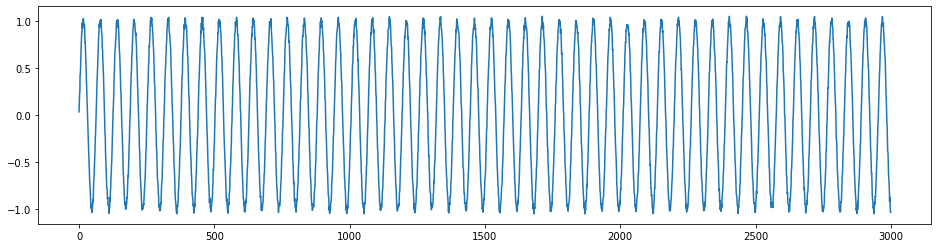

In [3]:
data_sin = np.sin(0.1*t) + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_sin)
plt.show()

In [4]:
print(data_sin.shape)

(3000,)


In [5]:
def convertToDataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal)-step):
    X.append(signal[i:i+step-1])
    Y.append(signal[i+step-1])
  return np.array(X), np.array(Y)

In [6]:
X, Y = convertToDataset(data_sin, 40)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
print(X_train.shape)
print(X_test.shape)

(2368, 39, 1)
(592, 39, 1)


In [10]:
print(Y_train.shape)
print(Y_test.shape)

(2368,)
(592,)


In [11]:
model = tf.keras.models.Sequential([
   layers.SimpleRNN(units=64, input_shape=(None, 1)),
   layers.Dense(1, activation='linear')
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MSE)

In [13]:
model.fit(X_train, Y_train, epochs=30, batch_size=16)

Epoch 1/30
148/148 [==============================] - 8s 45ms/step - loss: 0.0069
Epoch 2/30
148/148 [==============================] - 5s 31ms/step - loss: 0.0016
Epoch 3/30
148/148 [==============================] - 5s 32ms/step - loss: 0.0013
Epoch 4/30
148/148 [==============================] - 6s 39ms/step - loss: 0.0014
Epoch 5/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0012
Epoch 6/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0015
Epoch 7/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0013
Epoch 8/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0014
Epoch 9/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0013
Epoch 10/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0013
Epoch 11/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0013
Epoch 12/30
148/148 [==============================] - 4s 29ms/step - loss: 0.0014
Epoch 13/30
1

In [14]:
model.evaluate(X_test, Y_test)

19/19 [==============================] - 0s 7ms/step - loss: 0.0012


0.0011784578673541546

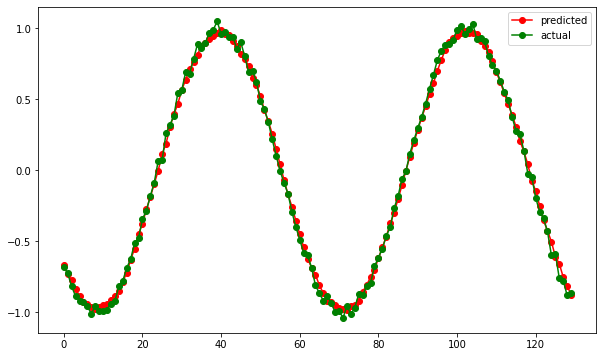

In [ ]:
N = 170
t = np.arange(0, N)
data_sin = np.sin(0.1*t) + np.random.uniform(-0.05, 0.05, N)
step = 40
plt.figure(figsize=(10, 6))
predicted = []
actual = []
for i in range(len(data_sin)-step):
    X = data_sin[i:i+step]    
    x = X.reshape(1, -1, 1)
    predicted.append(model.predict(x[:, :-1, :])[0, 0])
    actual.append(X[-1])
plt.plot(predicted, color='red', marker='o',label='predicted')
plt.plot(actual, color='green', marker='o', label='actual')
plt.legend()

# GRU

In [19]:
model = tf.keras.models.Sequential([
   layers.GRU(units=64),
   layers.Dense(1, activation='linear')
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MSE)

In [23]:
model.fit(X_train, Y_train, epochs=30 ,batch_size=16)

Epoch 1/30
148/148 [==============================] - 3s 10ms/step - loss: 0.0015
Epoch 2/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 3/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0014
Epoch 4/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 5/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 6/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 7/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0014
Epoch 8/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 9/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0012
Epoch 10/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0012
Epoch 11/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 12/30
148/148 [==============================] - 2s 10ms/step - loss: 0.0012
Epoch 13/30
1

In [24]:
model.evaluate(X_test,Y_test)

19/19 [==============================] - 1s 5ms/step - loss: 0.0012


0.0011671304237097502